In [65]:
#Importing modules and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("bank_transactions.csv")
# 

In [66]:
#Cleaning data
data.drop(["TransactionID"],axis=1,inplace=True)
custgender_mode = data.CustGender.mode().values[0]

data.CustGender.fillna(custgender_mode,inplace=True)
custlocation_mode = data.CustLocation.mode().values[0]
data.CustLocation.fillna(custlocation_mode,inplace=True)
custAB_median = data.CustAccountBalance.median()
data.CustAccountBalance.fillna(custAB_median,inplace=True)

data[["Birthdate", "Birthmonth", "Birthyear"]] = data["CustomerDOB"].str.split("/", expand = True)
data[["Tdate", "Tmonth", "Tyear"]] = data["TransactionDate"].str.split("/", expand = True)

data.Birthyear.fillna(data.Birthyear.median(),inplace=True)
age = []
difference = 0
for i in data.Birthyear.values:
    if int(i) < 16:
        difference = 16 - int(i)
    elif int(i) == 1800: #one observation with Birthyear 1800
        difference = 216
    else:
        difference = 100 - int(i) + 16
    age.append(difference)

data["Age"] = age

data[["Birthdate", "Birthmonth", "Birthyear"]] = data[["Birthdate", "Birthmonth", "Birthyear"]].astype(float)
data[["Tdate", "Tmonth", "Tyear"]] = data[["Tdate", "Tmonth", "Tyear"]].astype(float)

time = []
for i in data.TransactionTime.values:
    hour = i//10000
    time.append(hour)

data["TransactionHour"] = time

data.drop(["CustomerDOB"],inplace=True,axis=1)
data.drop(["TransactionDate"],inplace=True,axis=1)
data.drop(["TransactionTime"],inplace=True,axis=1)

In [67]:
data

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Birthdate,Birthmonth,Birthyear,Tdate,Tmonth,Tyear,Age,TransactionHour
0,C5841053,F,JAMSHEDPUR,17819.05,25.0,10.0,1.0,94.0,2.0,8.0,16.0,22,14
1,C2142763,M,JHAJJAR,2270.69,27999.0,4.0,4.0,57.0,2.0,8.0,16.0,59,14
2,C4417068,F,MUMBAI,17874.44,459.0,26.0,11.0,96.0,2.0,8.0,16.0,20,14
3,C5342380,F,MUMBAI,866503.21,2060.0,14.0,9.0,73.0,2.0,8.0,16.0,43,14
4,C9031234,F,NAVI MUMBAI,6714.43,1762.5,24.0,3.0,88.0,2.0,8.0,16.0,28,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,C8020229,M,NEW DELHI,7635.19,799.0,8.0,4.0,90.0,18.0,9.0,16.0,26,18
1048563,C6459278,M,NASHIK,27311.42,460.0,20.0,2.0,92.0,18.0,9.0,16.0,24,18
1048564,C6412354,M,HYDERABAD,221757.06,770.0,18.0,5.0,89.0,18.0,9.0,16.0,27,18
1048565,C6420483,M,VISAKHAPATNAM,10117.87,1000.0,30.0,8.0,78.0,18.0,9.0,16.0,38,18


In [68]:
#Bivariate analysis for numerical data
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

# 

CustAccountBalance         float64
TransactionAmount (INR)    float64
Birthdate                  float64
Birthmonth                 float64
Birthyear                  float64
Tdate                      float64
Tmonth                     float64
Tyear                      float64
Age                          int64
TransactionHour              int64
dtype: object

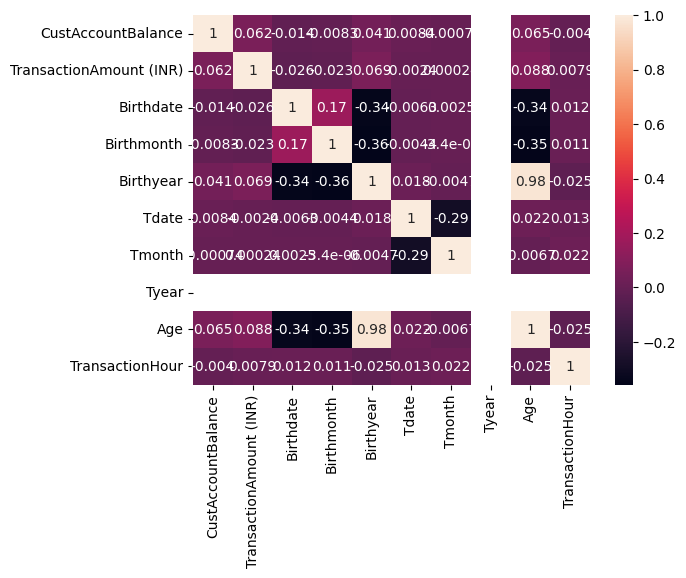

In [69]:
#Plotting heatmap indicating the level of linear correlation between the numerical variables
sns.heatmap(numerical.corr(), annot = True)
plt.show()

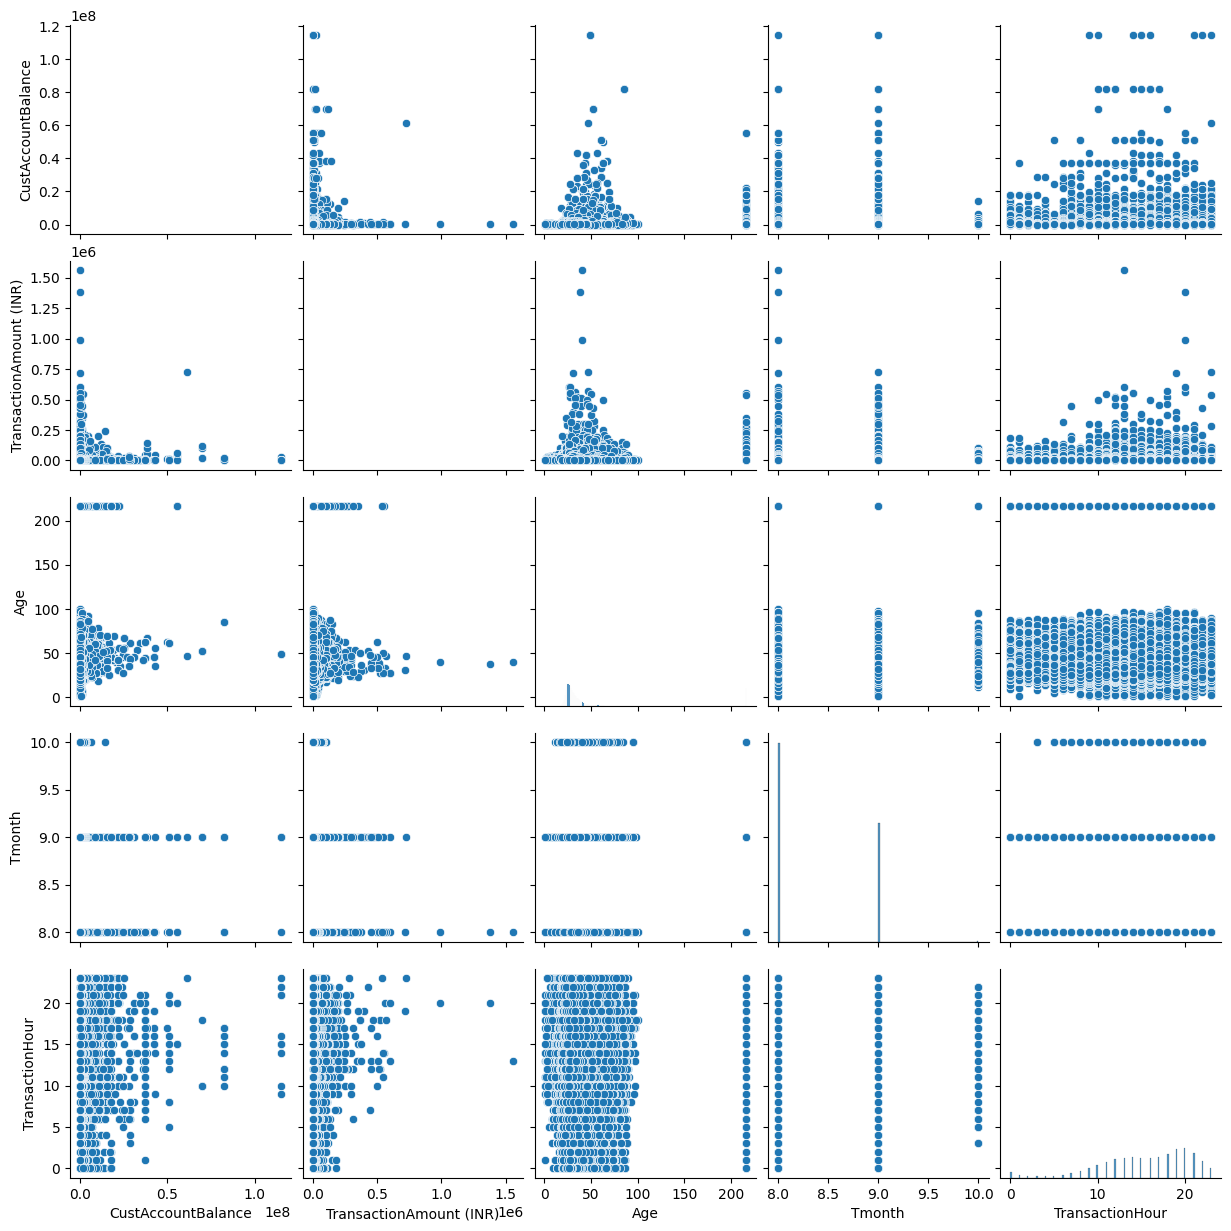

In [70]:
#Plotting pairplots of relevant numerical variables
sns.pairplot(numerical[["CustAccountBalance","TransactionAmount (INR)", "Age", "Tmonth", "TransactionHour" ]])
plt.show()
# 

In [71]:
#Converting gender into a categorical variable
data[["CustGender"]] = data[["CustGender"]].astype("category")

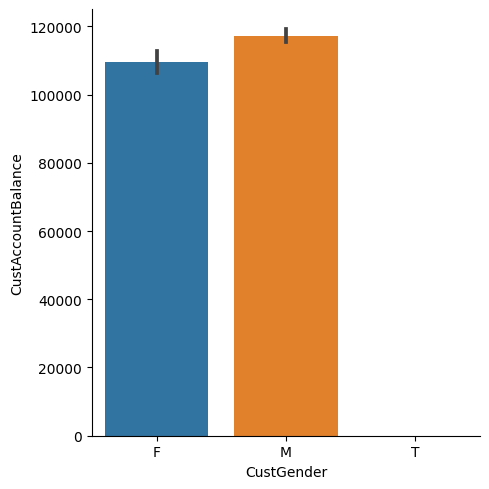

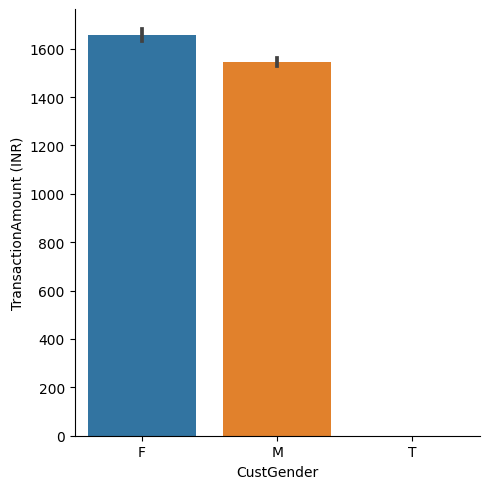

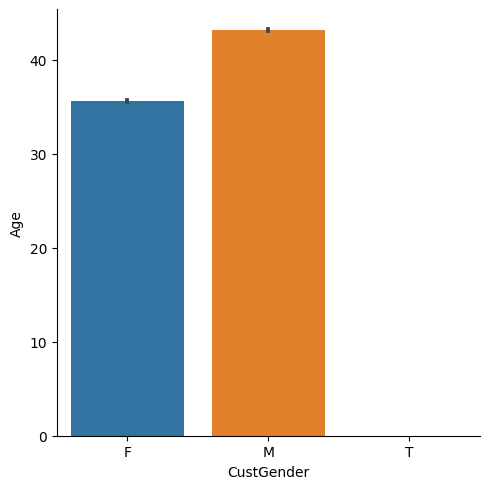

In [72]:
#Removing the gender 'Transgender' because it has only one observation with outliers that distort the graph visualizations
#Plotting gender (categorical) vs numerical variables
gender_to_remove = 'T'
data_filtered = data[data['CustGender'] != gender_to_remove]
sns.catplot(x='CustGender', y='CustAccountBalance', data= data_filtered, kind='bar')
sns.catplot(x='CustGender', y='TransactionAmount (INR)', data= data_filtered, kind='bar')
sns.catplot(x='CustGender', y='Age', data= data_filtered, kind='bar')

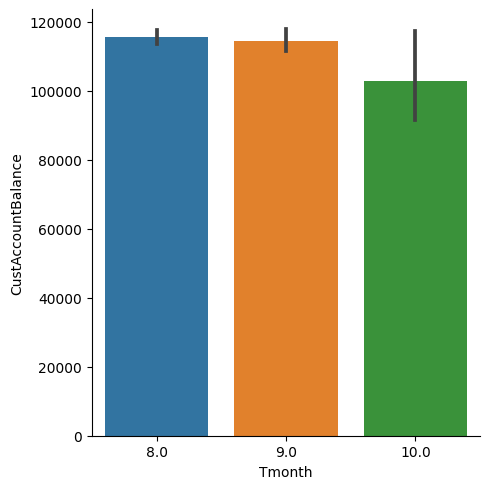

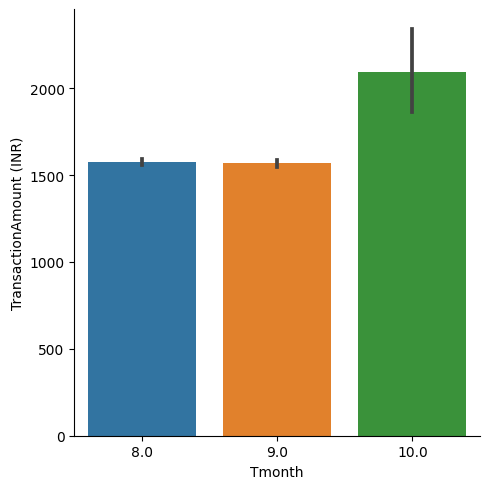

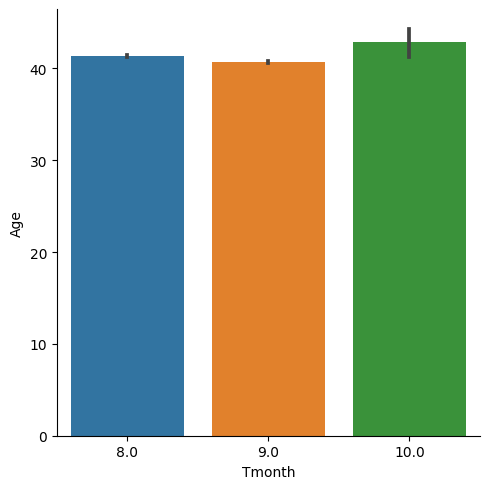

In [73]:
#Plotting transaction month (categorical) vs numerical variables
sns.catplot(x='Tmonth', y='CustAccountBalance', data= data, kind='bar')
sns.catplot(x='Tmonth', y='TransactionAmount (INR)', data= data, kind='bar')
sns.catplot(x='Tmonth', y='Age', data= data, kind='bar')

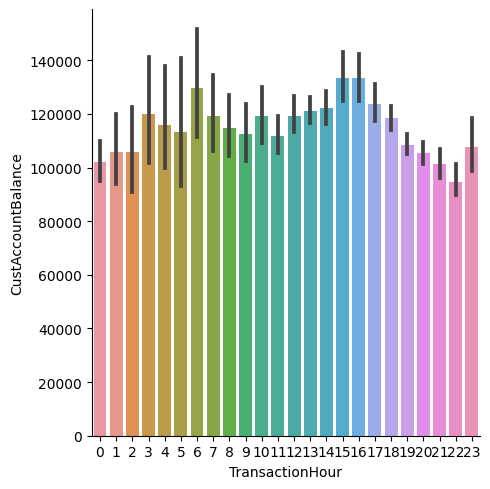

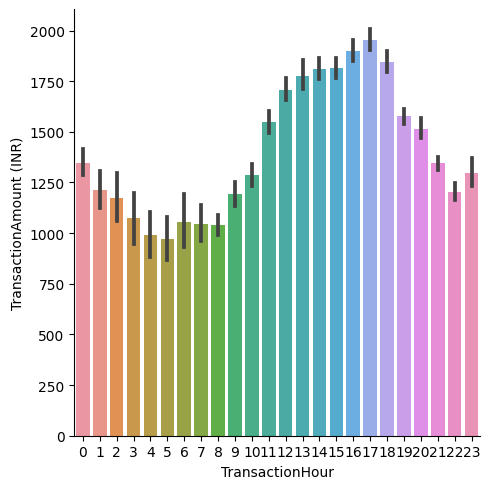

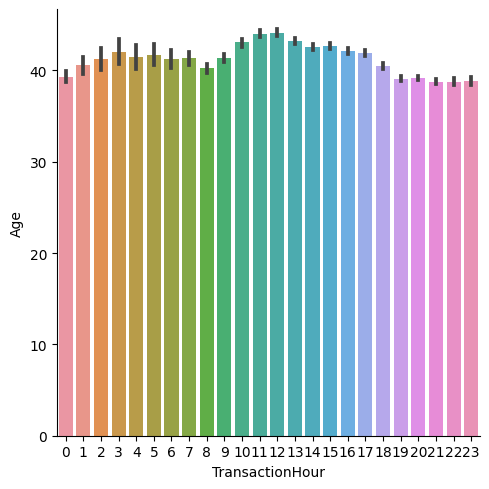

In [74]:
#Plotting transaction hour (categorical) vs numerical variables
sns.catplot(x='TransactionHour', y='CustAccountBalance', data= data, kind='bar')
sns.catplot(x='TransactionHour', y='TransactionAmount (INR)', data= data, kind='bar')
sns.catplot(x='TransactionHour', y='Age', data= data, kind='bar')

Tmonth        8.0     9.0   10.0
CustGender                      
F           176850  104076  1010
M           477083  286898  2649
T                0       1     0
TransactionHour     0     1     2     3     4     5     6      7      8   \
CustGender                                                                 
F                 3717  1796  1104   927   910  1060  1701   3200   5328   
M                14260  7055  4449  3793  3661  4299  6517  11379  18195   
T                    0     0     0     0     0     0     0      0      0   

TransactionHour     9   ...     14     15     16     17     18     19     20  \
CustGender              ...                                                    
F                 7643  ...  18862  18728  19531  21376  24778  28821  27169   
M                25455  ...  47692  46125  44826  47845  54554  65575  69884   
T                    0  ...      0      0      0      1      0      0      0   

TransactionHour     21     22     23  
CustGender    

<Axes: xlabel='TransactionHour'>

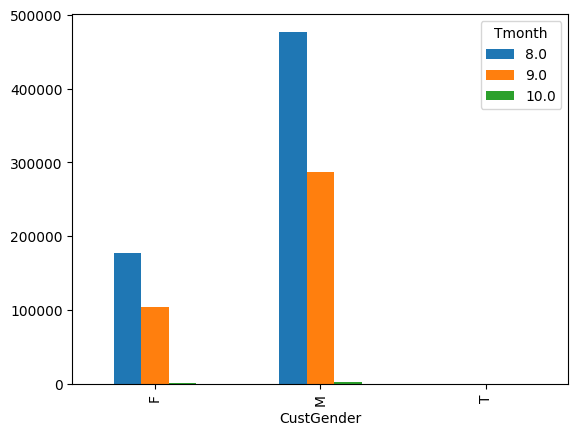

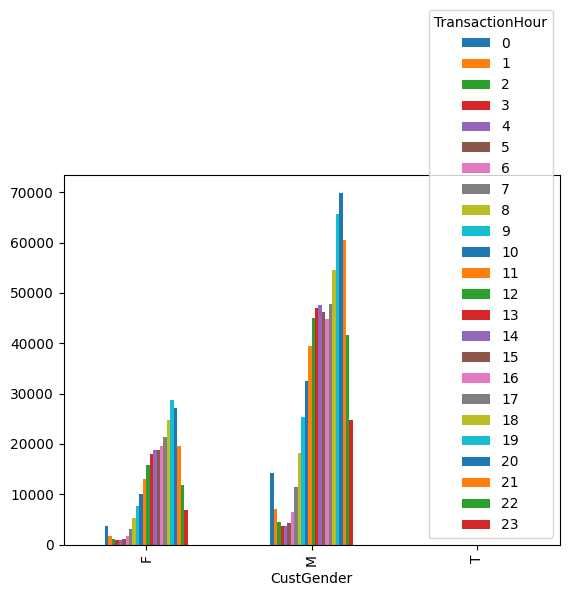

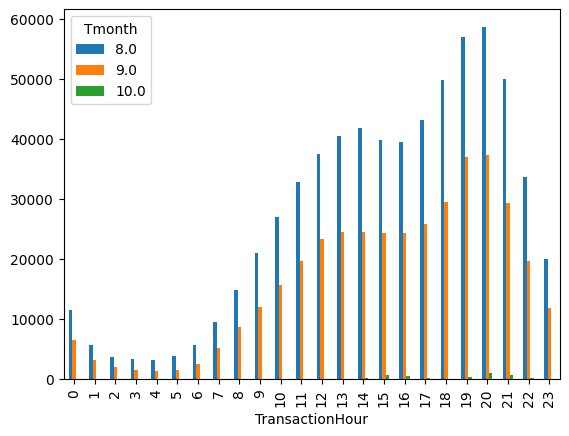

In [75]:
#Plotting the relationship between the cateogrical variables 
CrosstabResult=pd.crosstab(index=data['CustGender'],columns= data['Tmonth'])
print(CrosstabResult)
CrosstabResult.plot.bar()

CrosstabResult=pd.crosstab(index=data['CustGender'],columns= data['TransactionHour'])
print(CrosstabResult)
CrosstabResult.plot.bar()

CrosstabResult=pd.crosstab(index=data['TransactionHour'],columns= data['Tmonth'])
print(CrosstabResult)
CrosstabResult.plot.bar()